# Logistic Regression with the iris dataset

This notebook aims to apply the Logistic Regression classification model. The iris dataset will be used to construct two and three classes classification models based on these features:

- Two features (Sepal_Length, Sepal_Width)

- Two features (Pepal_Length, Pepal_Width)

- Four features (Sepal_Length, Sepal_Width, Petal_Length, Petal_Width)


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris


## Importing libraries

In [1]:
# Import the packages that we will be using
import numpy as np                  # For array
import matplotlib.pyplot as plt     # For showing plots
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

## Importing data

In [2]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
url = "datasets/iris/iris.csv"

# Load the dataset from HHDD
df  = pd.read_csv(url, header = None, names = colnames )

df


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Encoding the class label and remove one of the classes

Encoding the class label and remove one of the classes


In [3]:
# Encoding the class label categorical column: from string to num
df = df.replace({"Flower":  {"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":3} })

# Visualize the dataset
df


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


Now the label/category is numeric

Remove all aobservation from one of the classes

In [4]:
# Discard observation for one of the classes, e.g., class "setosa": to have only two classes in our dataset
#Label2Remove = 3 # (1,2,3)
#df = df[df.Flower!=Label2Remove]
#df

# NOTE: comment this if cell if you want to use the three classes


# Logistic Regression step-by-step



# Get dataset of variables **X** and labels **y** to be used with sklearn

Get dataset of variables **X** and labels **y**

In [5]:
# Select variables (one, two, three, four?)
#X  = df[["Sepal_Length", "Sepal_Width"]].values
#X  = df[["Petal_Length", "Petal_Width"]].values
X  = df[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values

# Get the class of each observation
y  = df["Flower"].values



# Logistic Regression using sklearn

Logistic Regression using sklearn

In [6]:
# Import library
from sklearn.linear_model import LogisticRegression

# Create model
LogReg    = LogisticRegression(C=1e5)

# Fit the model for the training data
LogReg.fit(X, y)

# New observation to classify
#xnew = [3.9, 3.1]
xnew = [6, 2.8, 4.9, 1.5]

# Make a prediction
ypredicted  = LogReg.predict([xnew])


Make predictions k-Nearest Neighbors (kNN)

In [7]:
print("For the input data: ")
print(xnew)

print("The predicted class is:")
print(ypredicted)


For the input data: 
[6, 2.8, 4.9, 1.5]
The predicted class is:
[2]


Explore and plot the Logistic Regression model

In [8]:
LogReg


LogisticRegression(C=100000.0)

In [9]:
# Get model intercept
b0 = LogReg.intercept_
print("The intercep b0 is", b0)

# Get model coefficient (slope) 
b1 = LogReg.coef_[0]
print("The slope coefficients bi are", b1)


The intercep b0 is [  2.15248309  20.22021327 -22.37269636]
The slope coefficients bi are [  3.93535245   9.1762292  -12.37077703  -5.92720618]


Plot Decision Boundary (This only works for two classes)

In [10]:
# from sklearn.inspection import DecisionBoundaryDisplay


# Evaluation of the k-Nearest Neighbor (kNN) model


## Holdout

Holdout: spliting the dataset in train and test sets once

In [13]:
# Import sklearn funtions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression

# Split data in train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.30) # , random_state = 0

# Create model
clf_LogReg    = LogisticRegression(C=1e5)

# Fit the model for the training data
clf_LogReg.fit(Xtrain,ytrain)

# Make the predictions using the test set
ypred_LogReg  = clf_LogReg.predict(Xtest)


C:\Users\L01046417\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Logistic Regression:  100.00 %


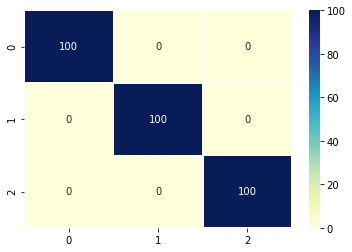

In [16]:
# Calculate tota accuracy
acc_LogReg    = 100*accuracy_score(ytest, ypred_LogReg)
print("Accuracy Logistic Regression:  {:.2f} %".format(acc_LogReg) )

# Calculate confusion matrix
CM_LogReg     = np.round(100*confusion_matrix(ytest, ypred_LogReg, normalize = 'true'))


# Plot confusion matrices
#fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=True)

sns.heatmap(CM_LogReg, annot=True, fmt='g', cmap="YlGnBu", linewidths=.5, vmin=0, vmax=100, center=50 )
#axes[0].set_title('Logistic Regression'); 

plt.show()

# Recall that:
# {"Flower":  {"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":3} }


## Repeated k-fold

Check the acurracy of the model using repeated k-fold cross-validation

# Final remarks

- Logistic regresion is a classification model ¡

- Logistic regresion compute the probability of each class given a new set of observation $Pr(Y = k|X = x) \, \, for \, \, k=1,2,...,K$ using the logistic function

- In statistical jargon, we model the conditional distribution of the response $Y$, given the predictor(s) $X$

# Activity



1- 

